# Decision Tree and Random Forest Classification, Model Selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_red = pd.read_csv('winequality-red-1.csv',sep=';')
df_white = pd.read_csv('winequality-white.csv',sep=';')

In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


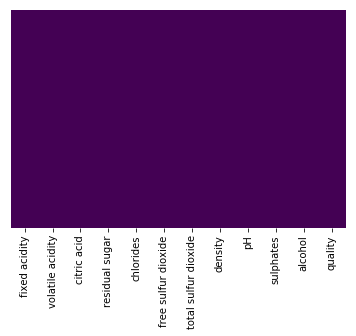

In [6]:
sns.heatmap(df_red.isnull(),cmap='viridis',yticklabels=False,cbar=False)

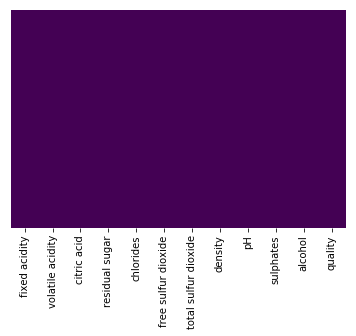

In [7]:
sns.heatmap(df_white.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [8]:
df_red['typeofwine'] = 'red'

In [9]:
df_white['typeofwine'] = 'white'

In [10]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,typeofwine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df = pd.concat([df_red,df_white],axis=0)

In [12]:
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,typeofwine
465,10.0,0.29,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.7,5,red
1142,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6,red
3841,6.6,0.21,0.50,8.7,0.036,41.0,191.0,0.99294,2.96,0.56,11.0,6,white
4661,8.0,0.23,0.41,1.1,0.048,35.0,150.0,0.99168,3.09,0.47,11.2,5,white
2944,7.1,0.29,0.34,7.8,0.036,49.0,128.0,0.99397,3.21,0.40,10.7,6,white
128,8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7,red
1591,6.4,0.12,0.49,6.4,0.042,49.0,161.0,0.99450,3.34,0.44,10.4,6,white
339,6.6,0.18,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.2,7,white
1113,7.4,0.18,0.40,1.6,0.047,22.0,102.0,0.99370,3.28,0.44,10.7,5,white
293,6.2,0.28,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,7,white


In [13]:
def func(x):
    if x == 'red':
        return 1
    elif x=='white':
        return 0
    else:
        return x

In [14]:
df['typeofwine'] = df['typeofwine'].apply(func)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,typeofwine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
X = df.drop('quality',axis=1)
y = df['quality']

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifiers = {
    'DT': DecisionTreeClassifier(max_depth=7),
    'RFC': RandomForestClassifier(max_depth=7,n_estimators=10,max_features=4)
}

In [25]:
head = list(classifiers.items())[:3]

for name,classifier in head:
    classifier.fit(X_train,y_train)
    score = classifier.score(X_test,y_test)
    print("{:<15} | score = {:.3f}".format(name,score))

DT              | score = 0.550
RFC             | score = 0.594


In [26]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,50)}

In [31]:
grid = GridSearchCV(DecisionTreeClassifier(),params,refit=True,verbose=3)

In [32]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 196 candidates, totalling 588 fits
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV]  criterion=gini, max_depth=1, splitter=best, score=0.4936562860438293, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV]  criterion=gini, max_depth=1, splitter=best, score=0.504041570438799, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV]  criterion=gini, max_depth=1, splitter=best, score=0.462738301559792, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=random ....................
[CV]  criterion=gini, max_depth=1, splitter=random, score=0.4354094579008074, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=random ....................
[CV]  criterion=gini, max_depth=1, splitter=random, score=0.4468822170900693, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=random ....................
[CV]  criterion=gini, max_depth=1, splitter=random, score=0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, splitter=random, score=0.4907621247113164, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=random ....................
[CV]  criterion=gini, max_depth=3, splitter=random, score=0.49624494511842865, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=best ......................
[CV]  criterion=gini, max_depth=4, splitter=best, score=0.5236447520184544, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=best ......................
[CV]  criterion=gini, max_depth=4, splitter=best, score=0.5363741339491916, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=best ......................
[CV]  criterion=gini, max_depth=4, splitter=best, score=0.5233968804159446, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=random ....................
[CV]  criterion=gini, max_depth=4, splitter=random, score=0.505767012687428, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=random ....................
[CV]  criterion=gini, max_de

[CV]  criterion=gini, max_depth=12, splitter=random, score=0.5496535796766744, total=   0.0s
[CV] criterion=gini, max_depth=12, splitter=random ...................
[CV]  criterion=gini, max_depth=12, splitter=random, score=0.5314846909300982, total=   0.0s
[CV] criterion=gini, max_depth=13, splitter=best .....................
[CV]  criterion=gini, max_depth=13, splitter=best, score=0.5490196078431373, total=   0.1s
[CV] criterion=gini, max_depth=13, splitter=best .....................
[CV]  criterion=gini, max_depth=13, splitter=best, score=0.5433025404157044, total=   0.0s
[CV] criterion=gini, max_depth=13, splitter=best .....................
[CV]  criterion=gini, max_depth=13, splitter=best, score=0.5430387059503178, total=   0.0s
[CV] criterion=gini, max_depth=13, splitter=random ...................
[CV]  criterion=gini, max_depth=13, splitter=random, score=0.5588235294117647, total=   0.0s
[CV] criterion=gini, max_depth=13, splitter=random ...................
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=21, splitter=best, score=0.5427251732101617, total=   0.0s
[CV] criterion=gini, max_depth=21, splitter=best .....................
[CV]  criterion=gini, max_depth=21, splitter=best, score=0.5597920277296361, total=   0.0s
[CV] criterion=gini, max_depth=21, splitter=random ...................
[CV]  criterion=gini, max_depth=21, splitter=random, score=0.5553633217993079, total=   0.0s
[CV] criterion=gini, max_depth=21, splitter=random ...................
[CV]  criterion=gini, max_depth=21, splitter=random, score=0.5479214780600462, total=   0.0s
[CV] criterion=gini, max_depth=21, splitter=random ...................
[CV]  criterion=gini, max_depth=21, splitter=random, score=0.5569035239745812, total=   0.0s
[CV] criterion=gini, max_depth=22, splitter=best .....................
[CV]  criterion=gini, max_depth=22, splitter=best, score=0.5547866205305652, total=   0.0s
[CV] criterion=gini, max_depth=22, splitter=best .....................
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=30, splitter=best, score=0.5594002306805075, total=   0.0s
[CV] criterion=gini, max_depth=30, splitter=best .....................
[CV]  criterion=gini, max_depth=30, splitter=best, score=0.5473441108545035, total=   0.0s
[CV] criterion=gini, max_depth=30, splitter=best .....................
[CV]  criterion=gini, max_depth=30, splitter=best, score=0.560947429231658, total=   0.0s
[CV] criterion=gini, max_depth=30, splitter=random ...................
[CV]  criterion=gini, max_depth=30, splitter=random, score=0.5467128027681661, total=   0.0s
[CV] criterion=gini, max_depth=30, splitter=random ...................
[CV]  criterion=gini, max_depth=30, splitter=random, score=0.5513856812933026, total=   0.0s
[CV] criterion=gini, max_depth=30, splitter=random ...................
[CV]  criterion=gini, max_depth=30, splitter=random, score=0.5696129404968227, total=   0.0s
[CV] criterion=gini, max_depth=31, splitter=best .....................
[CV]  criterion=gini, m

[CV]  criterion=gini, max_depth=39, splitter=random, score=0.5413056036972848, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=best .....................
[CV]  criterion=gini, max_depth=40, splitter=best, score=0.5455594002306805, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=best .....................
[CV]  criterion=gini, max_depth=40, splitter=best, score=0.5502309468822171, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=best .....................
[CV]  criterion=gini, max_depth=40, splitter=best, score=0.559214326978625, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=random ...................
[CV]  criterion=gini, max_depth=40, splitter=random, score=0.5403690888119954, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=random ...................
[CV]  criterion=gini, max_depth=40, splitter=random, score=0.5623556581986143, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=random ...................
[CV]  criterion=gini, m

[CV]  criterion=gini, max_depth=48, splitter=random, score=0.5626805314846909, total=   0.0s
[CV] criterion=gini, max_depth=49, splitter=best .....................
[CV]  criterion=gini, max_depth=49, splitter=best, score=0.5645905420991926, total=   0.1s
[CV] criterion=gini, max_depth=49, splitter=best .....................
[CV]  criterion=gini, max_depth=49, splitter=best, score=0.5560046189376443, total=   0.1s
[CV] criterion=gini, max_depth=49, splitter=best .....................
[CV]  criterion=gini, max_depth=49, splitter=best, score=0.5499711149624494, total=   0.1s
[CV] criterion=gini, max_depth=49, splitter=random ...................
[CV]  criterion=gini, max_depth=49, splitter=random, score=0.5749711649365629, total=   0.0s
[CV] criterion=gini, max_depth=49, splitter=random ...................
[CV]  criterion=gini, max_depth=49, splitter=random, score=0.5612009237875288, total=   0.0s
[CV] criterion=gini, max_depth=49, splitter=random ...................
[CV]  criterion=gini, 

[CV]  criterion=entropy, max_depth=8, splitter=random, score=0.5456120092378753, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV]  criterion=entropy, max_depth=8, splitter=random, score=0.5540150202195263, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.544405997693195, total=   0.1s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.5583140877598153, total=   0.1s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.5488157134604275, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=random .................
[CV]  criterion=entropy, max_depth=9, splitter=random, score=0.5167243367935409, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=random .................
[CV]  crite

[CV]  criterion=entropy, max_depth=17, splitter=best, score=0.5530565167243368, total=   0.1s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV]  criterion=entropy, max_depth=17, splitter=best, score=0.5612009237875288, total=   0.1s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV]  criterion=entropy, max_depth=17, splitter=best, score=0.5470826112073945, total=   0.1s
[CV] criterion=entropy, max_depth=17, splitter=random ................
[CV]  criterion=entropy, max_depth=17, splitter=random, score=0.5415224913494809, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=random ................
[CV]  criterion=entropy, max_depth=17, splitter=random, score=0.5675519630484989, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=random ................
[CV]  criterion=entropy, max_depth=17, splitter=random, score=0.5580589254766031, total=   0.0s
[CV] criterion=entropy, max_depth=18, splitter=best ..................
[CV]

[CV]  criterion=entropy, max_depth=25, splitter=random, score=0.546189376443418, total=   0.0s
[CV] criterion=entropy, max_depth=25, splitter=random ................
[CV]  criterion=entropy, max_depth=25, splitter=random, score=0.5459272097053726, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV]  criterion=entropy, max_depth=26, splitter=best, score=0.558246828143022, total=   0.1s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV]  criterion=entropy, max_depth=26, splitter=best, score=0.5675519630484989, total=   0.1s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV]  criterion=entropy, max_depth=26, splitter=best, score=0.5378393991912189, total=   0.1s
[CV] criterion=entropy, max_depth=26, splitter=random ................
[CV]  criterion=entropy, max_depth=26, splitter=random, score=0.5565167243367936, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=random ................
[CV]  

[CV]  criterion=entropy, max_depth=34, splitter=best, score=0.5709342560553633, total=   0.1s
[CV] criterion=entropy, max_depth=34, splitter=best ..................
[CV]  criterion=entropy, max_depth=34, splitter=best, score=0.5698614318706697, total=   0.1s
[CV] criterion=entropy, max_depth=34, splitter=best ..................
[CV]  criterion=entropy, max_depth=34, splitter=best, score=0.5320623916811091, total=   0.1s
[CV] criterion=entropy, max_depth=34, splitter=random ................
[CV]  criterion=entropy, max_depth=34, splitter=random, score=0.5351787773933102, total=   0.0s
[CV] criterion=entropy, max_depth=34, splitter=random ................
[CV]  criterion=entropy, max_depth=34, splitter=random, score=0.5531177829099307, total=   0.0s
[CV] criterion=entropy, max_depth=34, splitter=random ................
[CV]  criterion=entropy, max_depth=34, splitter=random, score=0.5800115540150202, total=   0.0s
[CV] criterion=entropy, max_depth=35, splitter=best ..................
[CV]

[CV]  criterion=entropy, max_depth=43, splitter=best, score=0.5594002306805075, total=   0.1s
[CV] criterion=entropy, max_depth=43, splitter=best ..................
[CV]  criterion=entropy, max_depth=43, splitter=best, score=0.5710161662817552, total=   0.1s
[CV] criterion=entropy, max_depth=43, splitter=best ..................
[CV]  criterion=entropy, max_depth=43, splitter=best, score=0.5389948006932409, total=   0.1s
[CV] criterion=entropy, max_depth=43, splitter=random ................
[CV]  criterion=entropy, max_depth=43, splitter=random, score=0.5380622837370242, total=   0.0s
[CV] criterion=entropy, max_depth=43, splitter=random ................
[CV]  criterion=entropy, max_depth=43, splitter=random, score=0.546189376443418, total=   0.0s
[CV] criterion=entropy, max_depth=43, splitter=random ................
[CV]  criterion=entropy, max_depth=43, splitter=random, score=0.5459272097053726, total=   0.0s
[CV] criterion=entropy, max_depth=44, splitter=best ..................
[CV] 

[Parallel(n_jobs=1)]: Done 588 out of 588 | elapsed:   21.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [33]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 44, 'splitter': 'random'}

In [34]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=44,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [35]:
grid_pred = grid.predict(X_test)

In [36]:
grid.score(X_test,grid_pred)

1.0